In [281]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [282]:
# Load the data
transaction = pd.read_excel(r"/content/QVI_transaction_data.xlsx")

In [283]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [284]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [285]:
# Check TXN_ID duplicate ID
transaction.TXN_ID.duplicated().sum()

1709

##### Missing data

In [286]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

- Zero null value in Our data provided

#### PROD_NAME
### PROD_NAME
- PROD_NAME is kind of long phrases with nonsense line, in this part It is  better to clean it and reduce the size of each item to one or two words with meaningful items and create another column to save the packing size.
- As we are only interested in words that will tell us if the product is chips or not, let’s remove all words with
digits and special characters such as ‘&’ from our set of product words.



In [287]:
# Extracting pack size from PROD_NAME
transaction['PACK_SIZE'] = transaction['PROD_NAME'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# Checking if the pack sizes look sensible
transactionData = transaction.groupby('PACK_SIZE').size().reset_index(name='counts').sort_values('PACK_SIZE', ascending=False)


In [288]:
transactionData

,PACK_SIZE,counts
20,380,6418
19,330,12540
18,300,15166
17,270,6285
16,250,3169
15,220,1564
14,210,6272
13,200,4473
12,190,2995
11,180,1468


- The largest size is 380g and the smallest size is 70g - seems sensible!


In [289]:

# remove the letter 'g' at the end of each row and all non-alphabetic characters
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace(r'[^a-zA-Z]+g?G?\s*$', '', regex = True).str.replace("S/","").str.replace("&","").str.replace(r"\d+","")

In [290]:
# Checking 10 rows
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly CreamOnion,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150
9,43330,7,7150,6900,52,Grain Waves Sour CreamChives,2,7.2,210


 - Date column became more readable an more useful with Date format which can be used to do time series forecasting and analysis throughout the time

In [291]:
# Covert DATE from digit to a datetime format
transaction['DATE'] = pd.to_datetime(pd.to_numeric(transaction['DATE'],errors='coerce'),unit = "D", origin = "1899-12-30")
transaction["DATE"]

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [292]:
transaction["DATE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: DATE
Non-Null Count   Dtype         
--------------   -----         
264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 MB


= As We can see above that the DATE column is converted from integer to Datetime

#### STORE_NBR

226    2022
88     1873
93     1832
165    1819
237    1785
43     1771
40     1764
230    1751
213    1747
156    1747
Name: STORE_NBR, dtype: int64


<Axes: title={'center': 'THE BEST 10 STORES'}>

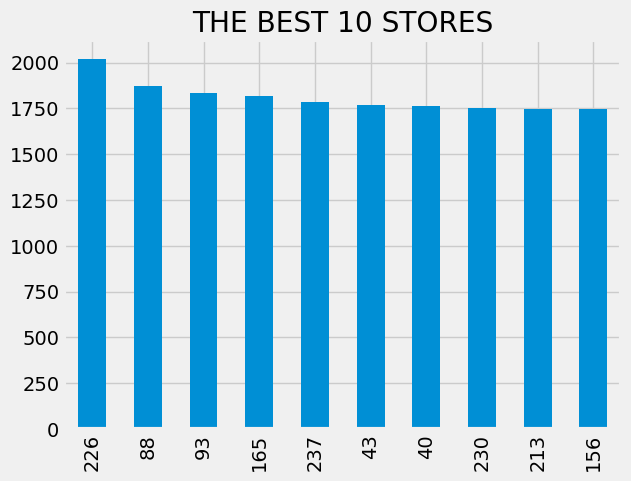

In [293]:
# The best 10 stores listed
print(transaction["STORE_NBR"].value_counts()[:10])
# the best 10 Store Number graph
transaction["STORE_NBR"].value_counts()[:10].plot.bar(title= "THE BEST 10 STORES")

- It can be seen that the *Store* with number **226** is the most frequent store with **2022** times followed by the **Store 88** with **1873** times

#### PRODUCT_NBR

In [294]:
len(transaction["PROD_NBR"].unique())

114

114 Is the number of the unique Products with no duplication

- There were *114* unique purchased product

102    3304
108    3296
33     3269
112    3268
75     3265
Name: PROD_NBR, dtype: int64


<Axes: >

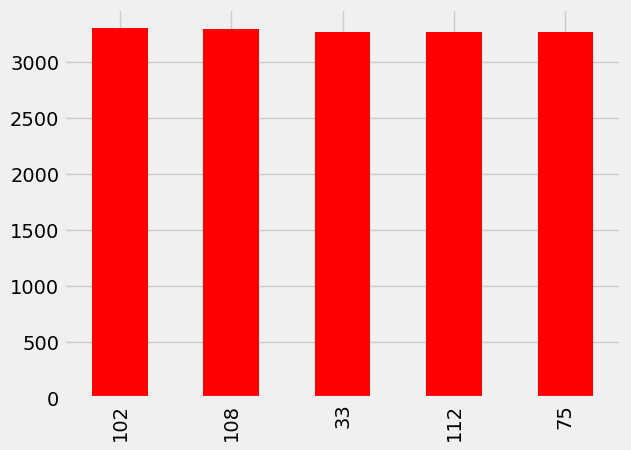

In [295]:
# The best 10 Products and most purchased
print(transaction["PROD_NBR"].value_counts()[:5])
transaction["PROD_NBR"].value_counts()[:5].plot.bar(color = 'r')

The most purchased products are, at first **102 108 33 112 75 **  with more than 3000 times

#### PROD_NBR	PROD_NAME

## Let's get the right name of each product and its number

In [296]:
prod = pd.Series(transaction.PROD_NBR.unique())  #.nunique()

In [297]:
name=pd.Series(transaction.PROD_NAME.unique())   #.nunique()

In [298]:
ls = []

for x in range(len(prod)):
  y = name[x]
  z = prod[x]
  lst = [y,z]
  ls.append(lst)

In [299]:
# list of 10 of each product with the number representative
pd.DataFrame(ls[:10])

,0,1
0,Natural Chip Compny SeaSalt,5
1,CCs Nacho Cheese,66
2,Smiths Crinkle Cut Chips Chicken,61
3,Smiths Chip Thinly CreamOnion,69
4,Kettle Tortilla ChpsHnyJlpno Chili,108
5,Old El Paso Salsa Dip Tomato Mild,57
6,Smiths Crinkle Chips Salt Vinegar,16
7,Grain Waves Sweet Chilli,24
8,Doritos Corn Chip Mexican Jalapeno,42
9,Grain Waves Sour CreamChives,52


In [300]:
len(ls)

114

All the work above was done to ensure that each product ahas a unique PROD_NBR

#### TOT_SALE Distribution

In [301]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


#### Detecting outliers

- 1_ PROD_QTY

PRO_QTY is my choice to detect outliers and as we can notice in the table above that the maximum in one transaction is 200 in the other hand the 1st,2nd, 3rd Quartiles are  much lower than 200, which means that 200 is a sign of outlier, lets use some functions to confirm

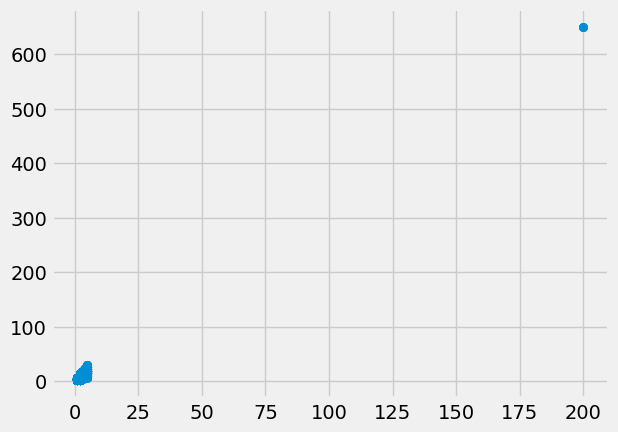

In [302]:
#Scatter  to visuailze how the data distributed
plt.scatter(transaction["PROD_QTY"],transaction["TOT_SALES"])


- It is abvious in the illustration above that we have transactions with  PROD_QTY = 200
- in the next part We make visualization with and without outliers concedering the transaction of 200 as outlier and make comparison of how outliers can effect the data
- At first. Let's extract the costumer and how many times the purchase happened   

In [303]:
outliers_row  = transaction.loc[transaction['PROD_QTY'] == 200]
outliers_row

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


The extraction above shows that the customer bought Chips in two different days, the customer hold the loyality card (226000)

In [304]:
# Let's see if the customer has had any other transactions with 226000 Loyality_card_number

outliers_row  = transaction.loc[transaction['LYLTY_CARD_NBR'] == 226000]
outliers_row

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


It looks like this customer has only had the two transactions over the year and is not an ordinary retail
customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty
card number from further analysis.


In the graph above we can see how outliers effect our Data and the analysis, which means We should be aware about Outliers in each case, and how the data normally distributed which for sure can be more helpful for our analysis instead of data with outliers

### Working on removing outliers

> Because of removing outliers is very sensitive in Data analysis,Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach.l ike z_score, IQR Q! and Q3,but in our case We want just to remove the customer with 200 and Loyality card number of 226000, this approach is considered the best to get good results and insights.





<Axes: ylabel='PROD_QTY'>

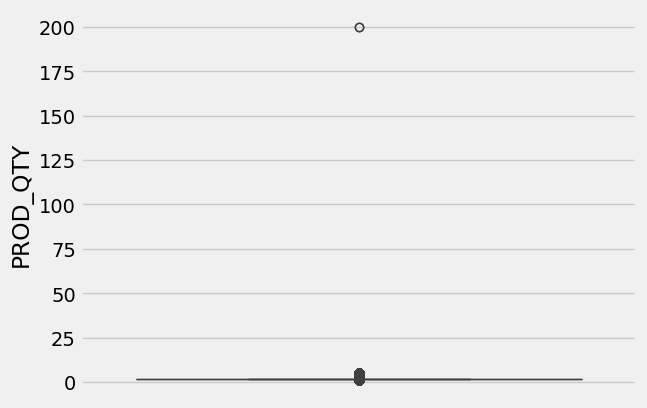

In [305]:
# Box Plot to showcase outliers
import seaborn as sns
sns.boxplot(transaction['PROD_QTY'])



In [306]:
# Remove Outliers
# In this case, We use loc command instead of complicated code

transaction  = transaction.loc[transaction['LYLTY_CARD_NBR'] != 226000]
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly CreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [307]:
# The code below shows how outliers removed from the DataFrame
outliers_check = transaction.loc[transaction['LYLTY_CARD_NBR'] == 226000]
outliers_check

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


In [308]:
# DataFrame summary after removing outliers

transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


- Depending on the summary above, It looks better now to move to the next step where We can work with DATES to get more insights

In [309]:
# How much unique days We have in our dataset
transaction["DATE"].nunique()

364

- The dataset is approximately for one year



In [310]:
transaction.sort_values(by = "DATE", inplace = True) # Sort the DATES
# lets get the first and the last rows from concedering DATE column as an index,
pd.concat([transaction.head(1),transaction.tail(1)])

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
205333,2018-07-01,24,24109,20881,54,CCs Original,2,4.2,175
6570,2019-06-30,28,28004,24553,98,NCC Sour Cream Garden Chives,2,6.0,175


- lets Visualize the total sales through the time

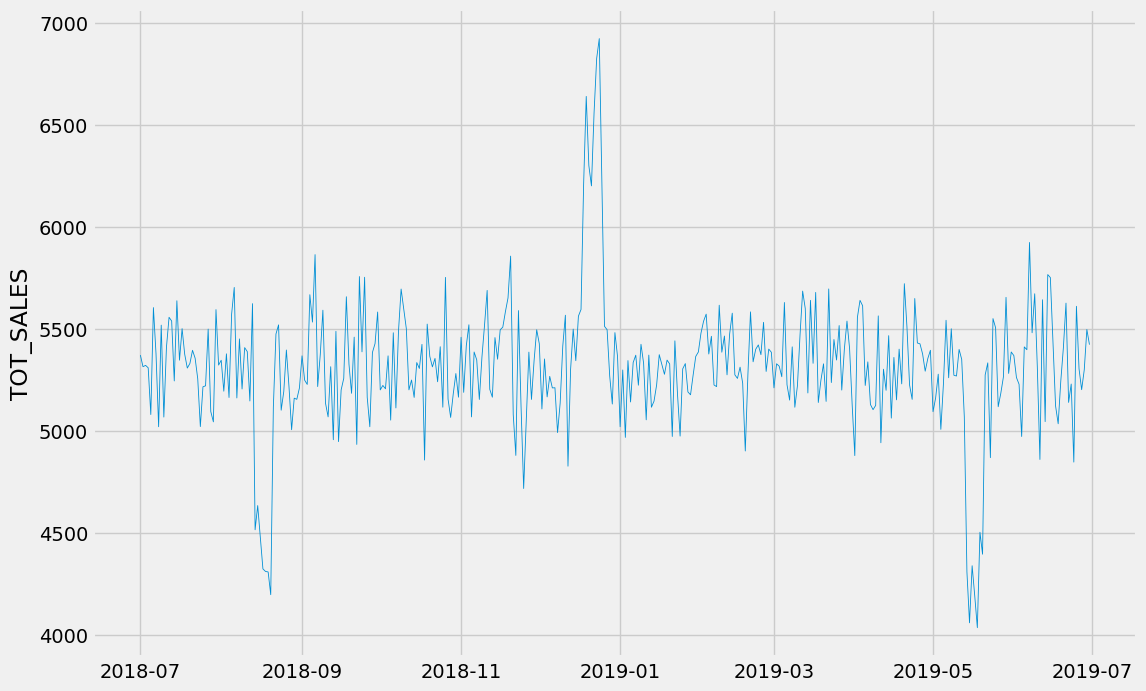

In [311]:
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 8))

transaction_per_time = transaction.groupby("DATE")['TOT_SALES'].sum()
# Labelling the axes and setting
plt.ylabel("TOT_SALES")
plt.plot(transaction_per_time, linewidth = .6)


We can see that there is an increase in purchases in December (The End of the year) and a break in late December. And decrease in purchases in the last days of August 2018 and May 2019

#### ROD_NBR	 & PROD_QTY

In [312]:
group_PROD_NBR = transaction[['PROD_NAME','PROD_QTY']]
grouped_PROD = group_PROD_NBR.groupby(['PROD_NAME']).sum()
grouped_PROD.sort_values(['PROD_QTY'],ascending=False)[:10]

,PROD_QTY
PROD_NAME,
Kettle Mozzarella Basil Pesto,6381
Kettle Tortilla ChpsHnyJlpno Chili,6309
Cobs Popd Sea Salt Chips,6277
Cobs Popd Swt/Chlli Sr/Cream Chips,6256
Tostitos Splash Of Lime,6234
Tyrrells Crisps Ched Chives,6227
Kettle g Swt Pot Sea Salt,6212
Infuzions Thai SweetChili PotatoMix,6206
Thins Potato Chips Hot Spicy,6185


# 2) purchase behavior data:


This part is specified to analyse the second dataset of **purchased_behaviour**

In [313]:
purchase_behaviour = pd.read_csv(r"/content/QVI_purchase_behaviour.csv")
purchase_behaviour.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [314]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [315]:
# Check duplicate card numbers
purchase_behaviour.LYLTY_CARD_NBR.duplicated().sum()

0

In [316]:
# Missing Values
purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- It is obvious that the dataset has zero missing values

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


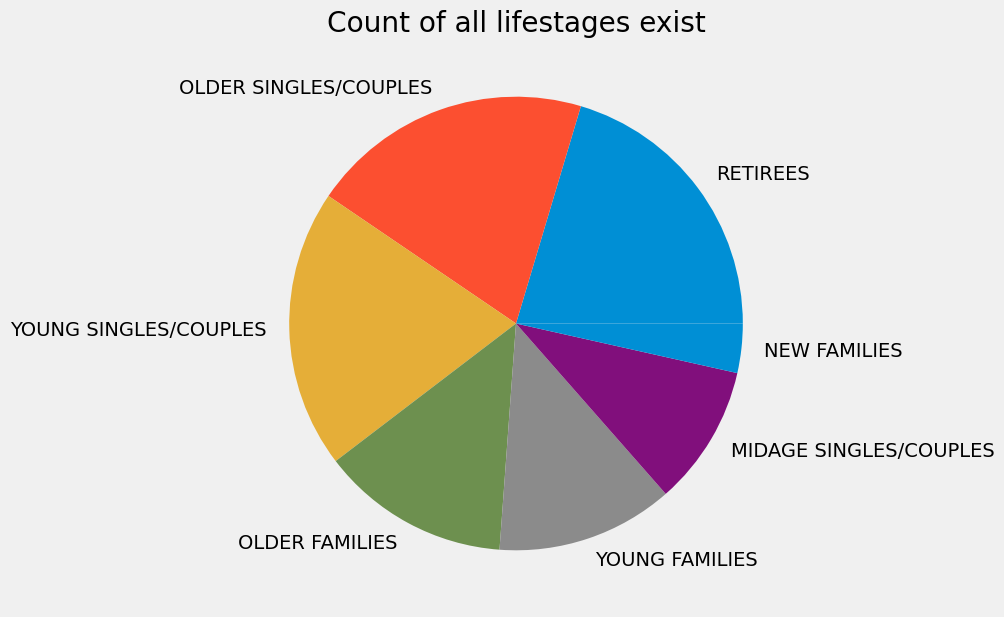

In [317]:
print(purchase_behaviour['LIFESTAGE'].value_counts())
purchase_behaviour['LIFESTAGE'].value_counts().plot.pie(figsize=(7,7),title = "Count of all lifestages exist",legend = False,
                                                       ylabel = "");

- obvious that LIFESTAGE contains 7 classes

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


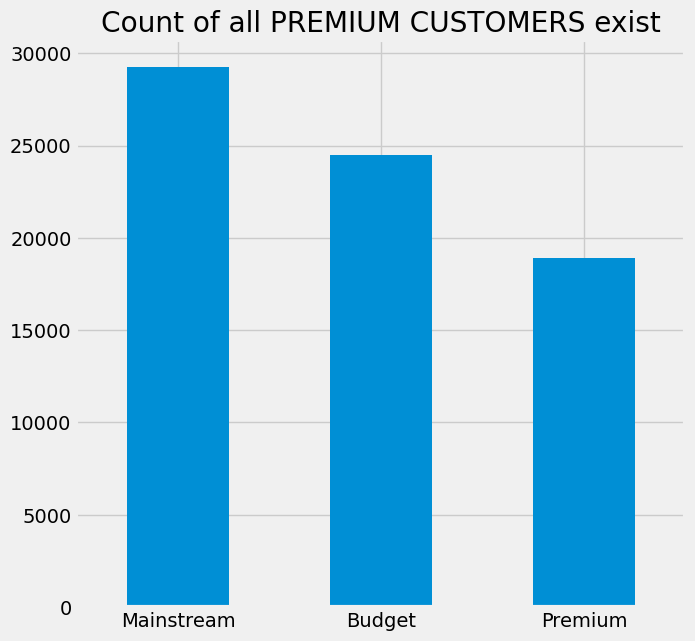

In [318]:
# PREMIUM_CUSTOMER
print(purchase_behaviour['PREMIUM_CUSTOMER'].value_counts())
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts().plot.bar(figsize=(7,7),title = "Count of all PREMIUM CUSTOMERS exist",legend = False,
                                                       ylabel = "",rot = 0);

Depending on the illustration above of the bar graph Mainstream has the high amount with 29245 purhasing time fllowed by Budget and Premium with 24470  and 18922 respectively

In [319]:
# Merge Transaction & purchase_behaviour

# Merging transaction data to customer data
data = pd.merge(transaction, purchase_behaviour, how='left', on='LYLTY_CARD_NBR')

# Checking the output
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,24,24109,20881,54,CCs Original,2,4.2,175,YOUNG FAMILIES,Mainstream
1,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips ChsOnion,2,5.8,170,YOUNG FAMILIES,Budget
2,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original,2,8.8,170,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med,2,10.2,300,YOUNG FAMILIES,Premium
4,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime,2,9.2,150,RETIREES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,26,26054,22482,34,Pringles Slt Vingar,2,7.4,134,RETIREES,Mainstream
264830,2019-06-30,201,201371,201571,36,Kettle Chilli,2,10.8,175,OLDER FAMILIES,Premium
264831,2019-06-30,222,222089,222019,114,Kettle Sensations Siracha Lime,2,9.2,150,OLDER FAMILIES,Budget
264832,2019-06-30,230,230102,232603,52,Grain Waves Sour CreamChives,2,7.2,210,OLDER SINGLES/COUPLES,Premium


In [320]:
# Checking any nulls after the left join
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- Perfect!, No null data exists,all our customers in the transaction data has been accounted for in the customer
dataset (purchase_behaviour)

------------------------------
- Now We can say that the data exploration is complete and we can proceed to the next phase of Data Analysis

In  this phase We will work on the main tasks from Zlinka email:
-
- Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia.

- Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis.

- Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

Looking forward to reviewing your work.

Thanks,

Zilinka'



In [321]:
# print out the first 5th rows and get a look at our data
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,24,24109,20881,54,CCs Original,2,4.2,175,YOUNG FAMILIES,Mainstream
1,2018-07-01,236,236023,238660,100,Smiths Crinkle Cut Chips ChsOnion,2,5.8,170,YOUNG FAMILIES,Budget
2,2018-07-01,45,45100,40977,47,Doritos Corn Chips Original,2,8.8,170,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,21,21284,17968,59,Old El Paso Salsa Dip Tomato Med,2,10.2,300,YOUNG FAMILIES,Premium
4,2018-07-01,262,262188,262373,114,Kettle Sensations Siracha Lime,2,9.2,150,RETIREES,Budget


- Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.

In [322]:
# Getting groups by LIFESTAGE, PREMIUM COSTUMER and TOT_SALES and covert them to proportions

proportions = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])["TOT_SALES"].sum().reset_index()
proportions["TOT_SALES"] = proportions["TOT_SALES"]*100/ proportions["TOT_SALES"].sum()
proportions

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,1.837180
1,MIDAGE SINGLES/COUPLES,Mainstream,4.697281
2,MIDAGE SINGLES/COUPLES,Premium,3.022720
3,NEW FAMILIES,Budget,1.134358
4,NEW FAMILIES,Mainstream,0.880129
5,NEW FAMILIES,Premium,0.594434
6,OLDER FAMILIES,Budget,8.709428
7,OLDER FAMILIES,Mainstream,5.351236
8,OLDER FAMILIES,Premium,4.172457
9,OLDER SINGLES/COUPLES,Budget,7.075099


In [323]:
data_group = pd.DataFrame(proportions[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum())
data_group

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             1.837180
                       Mainstream         4.697281
                       Premium            3.022720
NEW FAMILIES           Budget             1.134358
                       Mainstream         0.880129
                       Premium            0.594434
OLDER FAMILIES         Budget             8.709428
                       Mainstream         5.351236
                       Premium            4.172457
OLDER SINGLES/COUPLES  Budget             7.075099
                       Mainstream         6.900459
                       Premium            6.841970
RETIREES               Budget             5.853133
                       Mainstream         8.053171
                       Premium            5.051228
YOUNG FAMILIES         Budget             7.208358
                       Mainstream         4.799960
                       Premium            4.346637
YOUNG SINGLES/COUPLES  Budget             3.162854
                       Mainstream         8.153762
                       Premium            2.154145

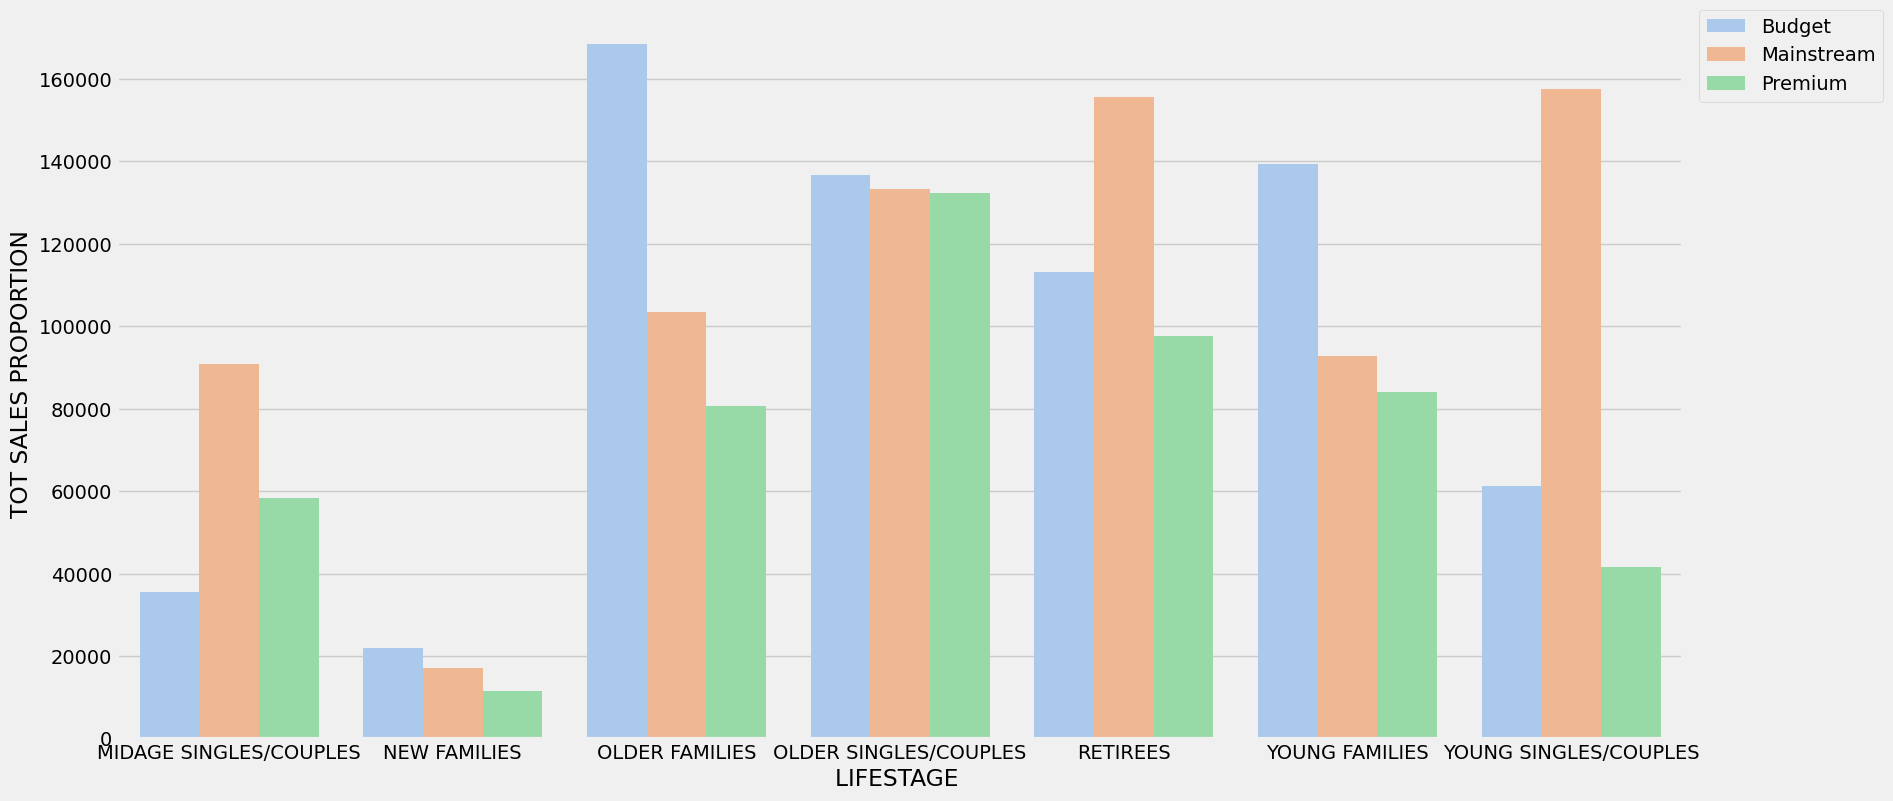

In [324]:
#   Plotting a bar graph of the total sales for each lifestage and whether it is a Premium, Mainstream, or Budget customer during the entire recorded duration.

proportions = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])["TOT_SALES"].sum().reset_index()
plt.figure(figsize=(18, 9))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=proportions, palette="pastel")
#plt.title("Total Sales for Each Lifestage Customer Segment During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("LIFESTAGE ")
plt.ylabel("TOT SALES PROPORTION")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream-retirees

- Let’s see if the higher sales are due to there being more customers who buy chips.

In [325]:
customers = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])["LYLTY_CARD_NBR"].nunique().reset_index()
customers

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2273
9,OLDER SINGLES/COUPLES,Budget,4929


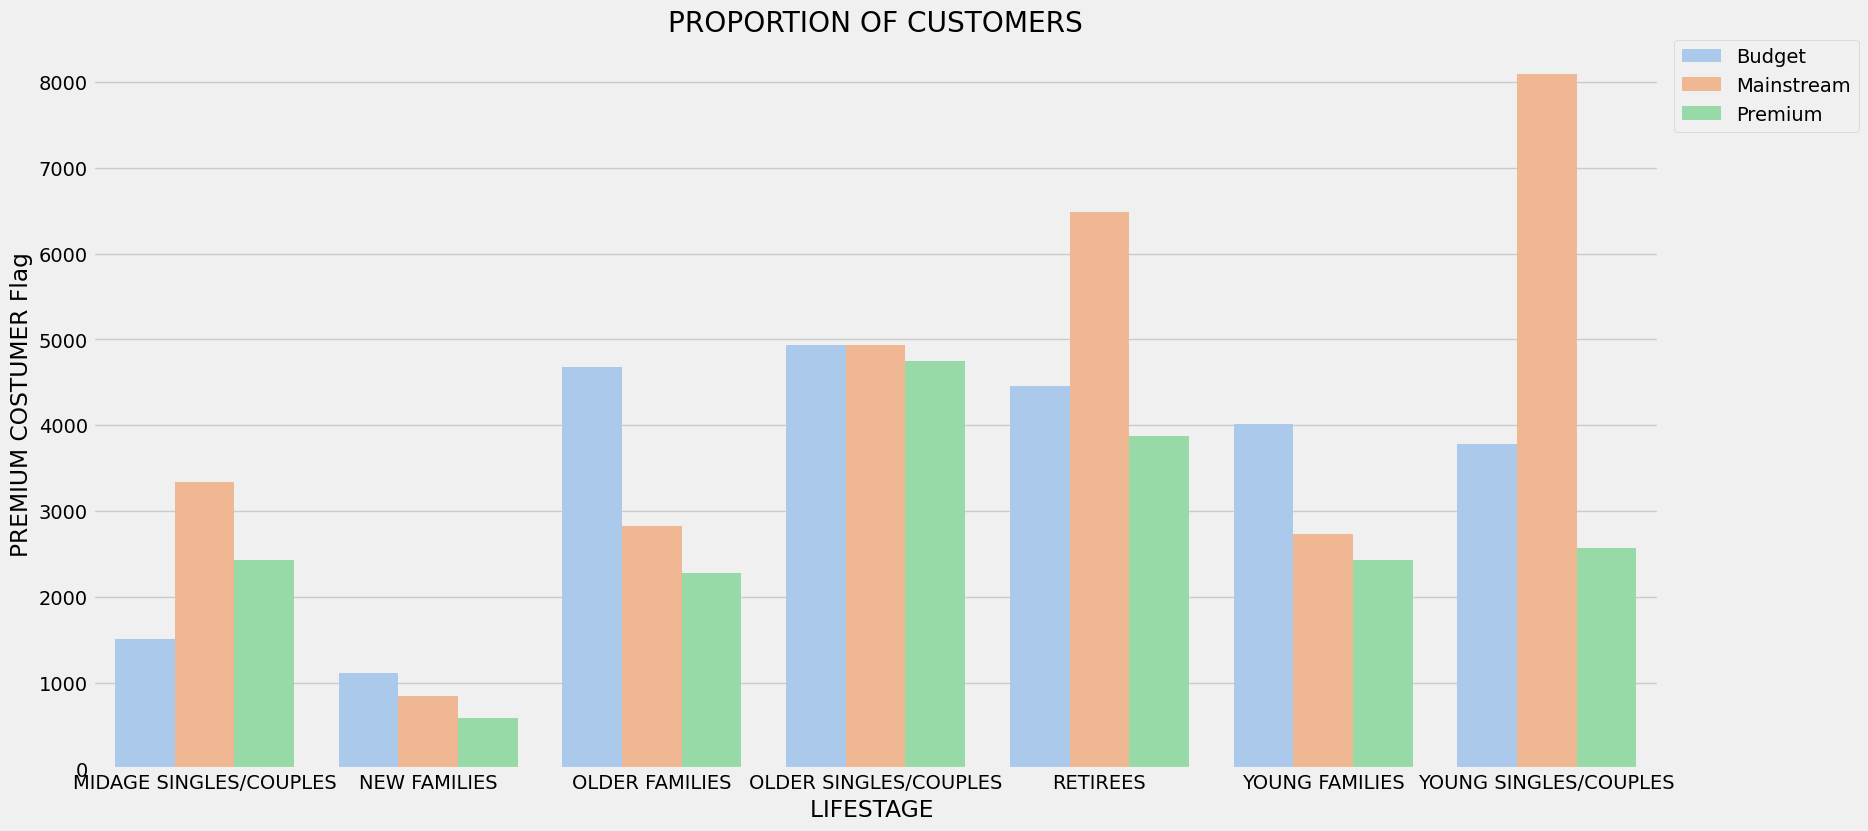

In [330]:
#   Plotting a bar graph of the total sales for each lifestage and whether it is a Premium, Mainstream, or Budget customer during the entire recorded duration.

customers = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])["LYLTY_CARD_NBR"].nunique().reset_index()
plt.figure(figsize=(18, 9))
sns.barplot(x="LIFESTAGE", y="LYLTY_CARD_NBR", hue="PREMIUM_CUSTOMER", data=customers, palette="pastel")
plt.title("PROPORTION OF CUSTOMERS")
plt.xlabel("LIFESTAGE ")
plt.ylabel("PREMIUM COSTUMER Flag")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

here are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget-Older families segment.
- Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this
next.


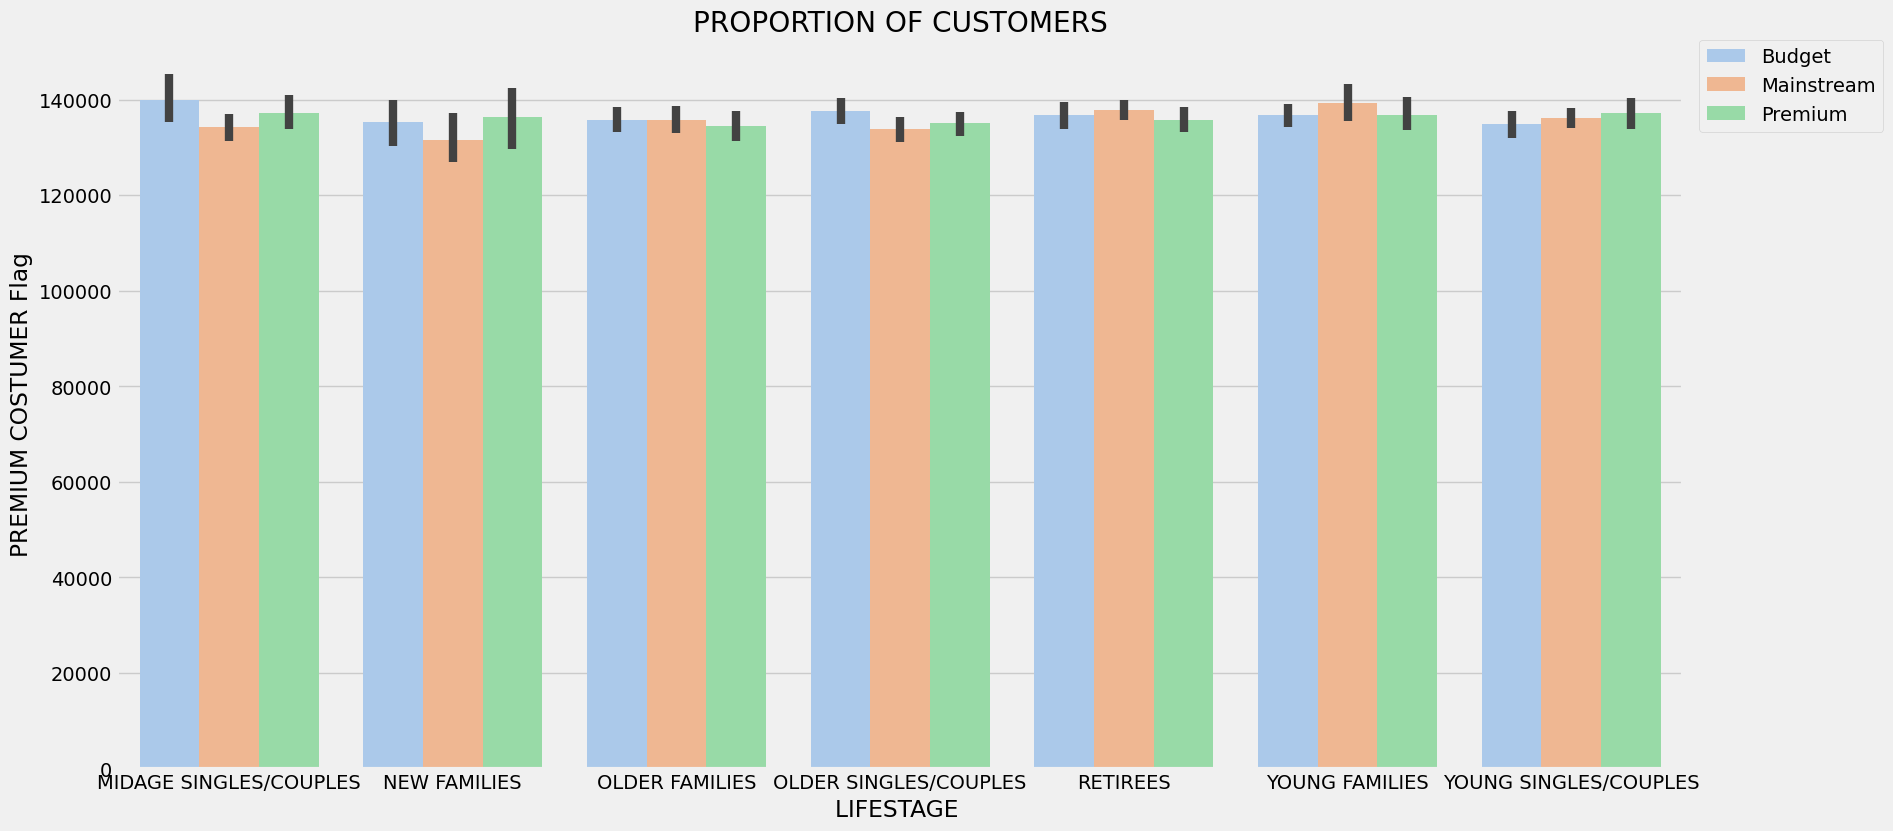

In [338]:
#   Plotting a bar graph of the total sales for each lifestage and whether it is a Premium, Mainstream, or Budget customer during the entire recorded duration.

customers = pd.DataFrame(data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','LYLTY_CARD_NBR'])["PROD_QTY"].mean())
plt.figure(figsize=(18, 9))
sns.barplot(x="LIFESTAGE", y="LYLTY_CARD_NBR", hue="PREMIUM_CUSTOMER", data=customers, palette="pastel")
plt.title("PROPORTION OF CUSTOMERS")
plt.xlabel("LIFESTAGE ")
plt.ylabel("PREMIUM COSTUMER Flag")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()